In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [54]:
df = pd.read_csv('../data/events.csv', engine='c', 
                 usecols=['date', 'event_id', 'ref_type','ref_hash', 'application_id', 'attributed',
                          'device_os_version', 'device_model', 'device_city',
                          'carrier', 'kind', 'device_os', 'connection_type', 'ip_address', 'device_language', 'trans_id'],
                 dtype={'event_id':np.int8, 'ref_type':np.int8, 'application_id':np.int8,
                        'device_os_version':'category', 'device_model':'category', 'device_city':'category' ,
                        'carrier':'category', 'kind':'category', 'device_os':'category',
                        'connection_type':'category', 'device_language':'category'})

C:\Users\Fabrizio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
df.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_os_version', 'device_model', 'device_city',
       'trans_id', 'carrier', 'kind', 'device_os', 'connection_type',
       'ip_address', 'device_language'],
      dtype='object')

# Eventos a través del tiempo

In [56]:
df['date'] = pd.to_datetime(df.date)

In [57]:
df['Anio'] = df['date'].dt.year
df['Mes'] = df['date'].dt.month
df['Dia'] = df['date'].dt.day
df['Hora'] = df['date'].dt.hour

In [58]:
df_date = df[['Anio','Mes','Dia','Hora','date']]

In [59]:
df_date.nunique()

Anio          1
Mes           1
Dia           9
Hora         24
date    2488829
dtype: int64

In [60]:
df_date['Dia'].value_counts()

13    316267
12    296665
10    293091
9     286221
8     285535
11    268884
7     253706
6     253505
5     240549
Name: Dia, dtype: int64

In [61]:
df_date_per_month = df_date[['Dia','date']]

In [62]:
df_date_per_month = df_date_per_month.groupby('Dia').count()

In [63]:
df_date_per_month.head(2)

,date
Dia,
5,240549
6,253505


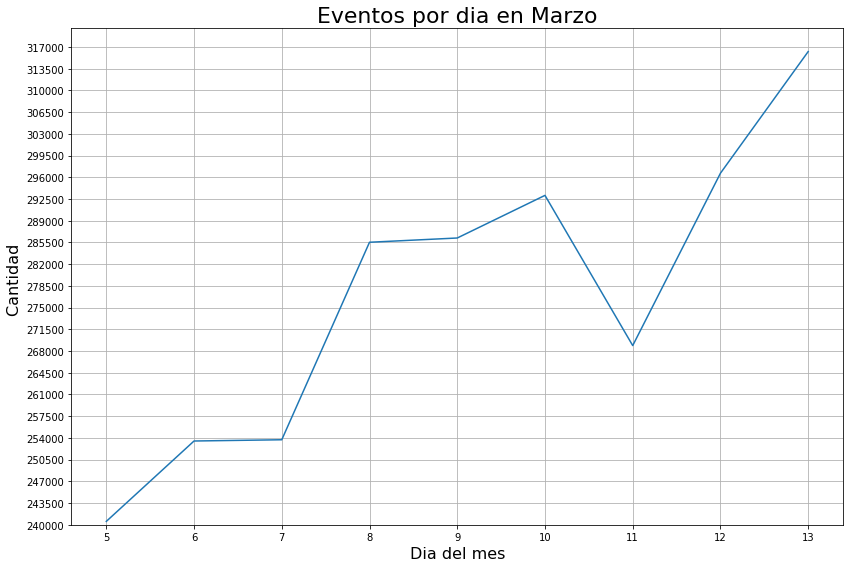

In [64]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title('Eventos por dia en Marzo',fontsize=22)
plt.xlabel('Dia del mes',fontsize=16)
plt.ylabel('Cantidad ',fontsize=16)
plt.ylim(240000, 320001)
plt.grid()
plt.xticks(np.arange(4, 14, 1.0))
plt.yticks(np.arange(240000, 320001, 3500.0))
plt.tight_layout()
plt.plot(df_date_per_month['date'])
plt.savefig("res/events_per_day.png",dpi=100)

## Cantidad de eventos por hora durante el mes de Marzo

In [65]:
df_date_per_hour = df_date[['Hora','date']]

In [66]:
df_date_per_hour = df_date_per_hour.groupby('Hora',as_index=False).count()

In [67]:
df_date_per_hour = df_date_per_hour['date']

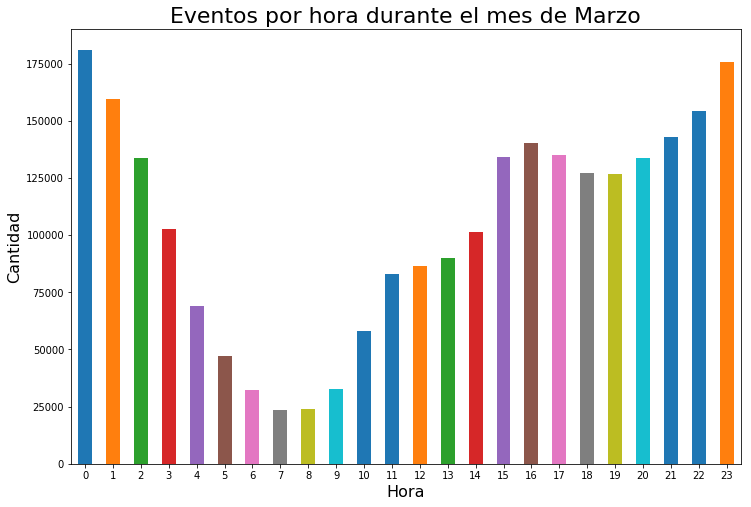

In [68]:
f = plt.figure()
plt.title('Eventos por hora durante el mes de Marzo',fontsize=22)
ax = df_date_per_hour.plot(kind='bar',rot=0,figsize=(12,8));
ax.set_ylabel('Cantidad',fontsize=16);
ax.set_xlabel('Hora',fontsize=16);
plt.savefig("res/events_per_hour.png",dpi=100)

## Cantidad de eventos por hora para cada dia de Marzo del dataframe

In [69]:
df_date_per_day = df_date[['Dia','Hora','date']]

In [70]:
df_date_per_day = df_date_per_day.groupby(['Dia','Hora']).agg('count')

In [71]:
df_date_per_day = df_date_per_day.unstack(level=0)
df_date_per_day.columns = df_date_per_day.columns.droplevel()
df_date_per_day = df_date_per_day.fillna(0)

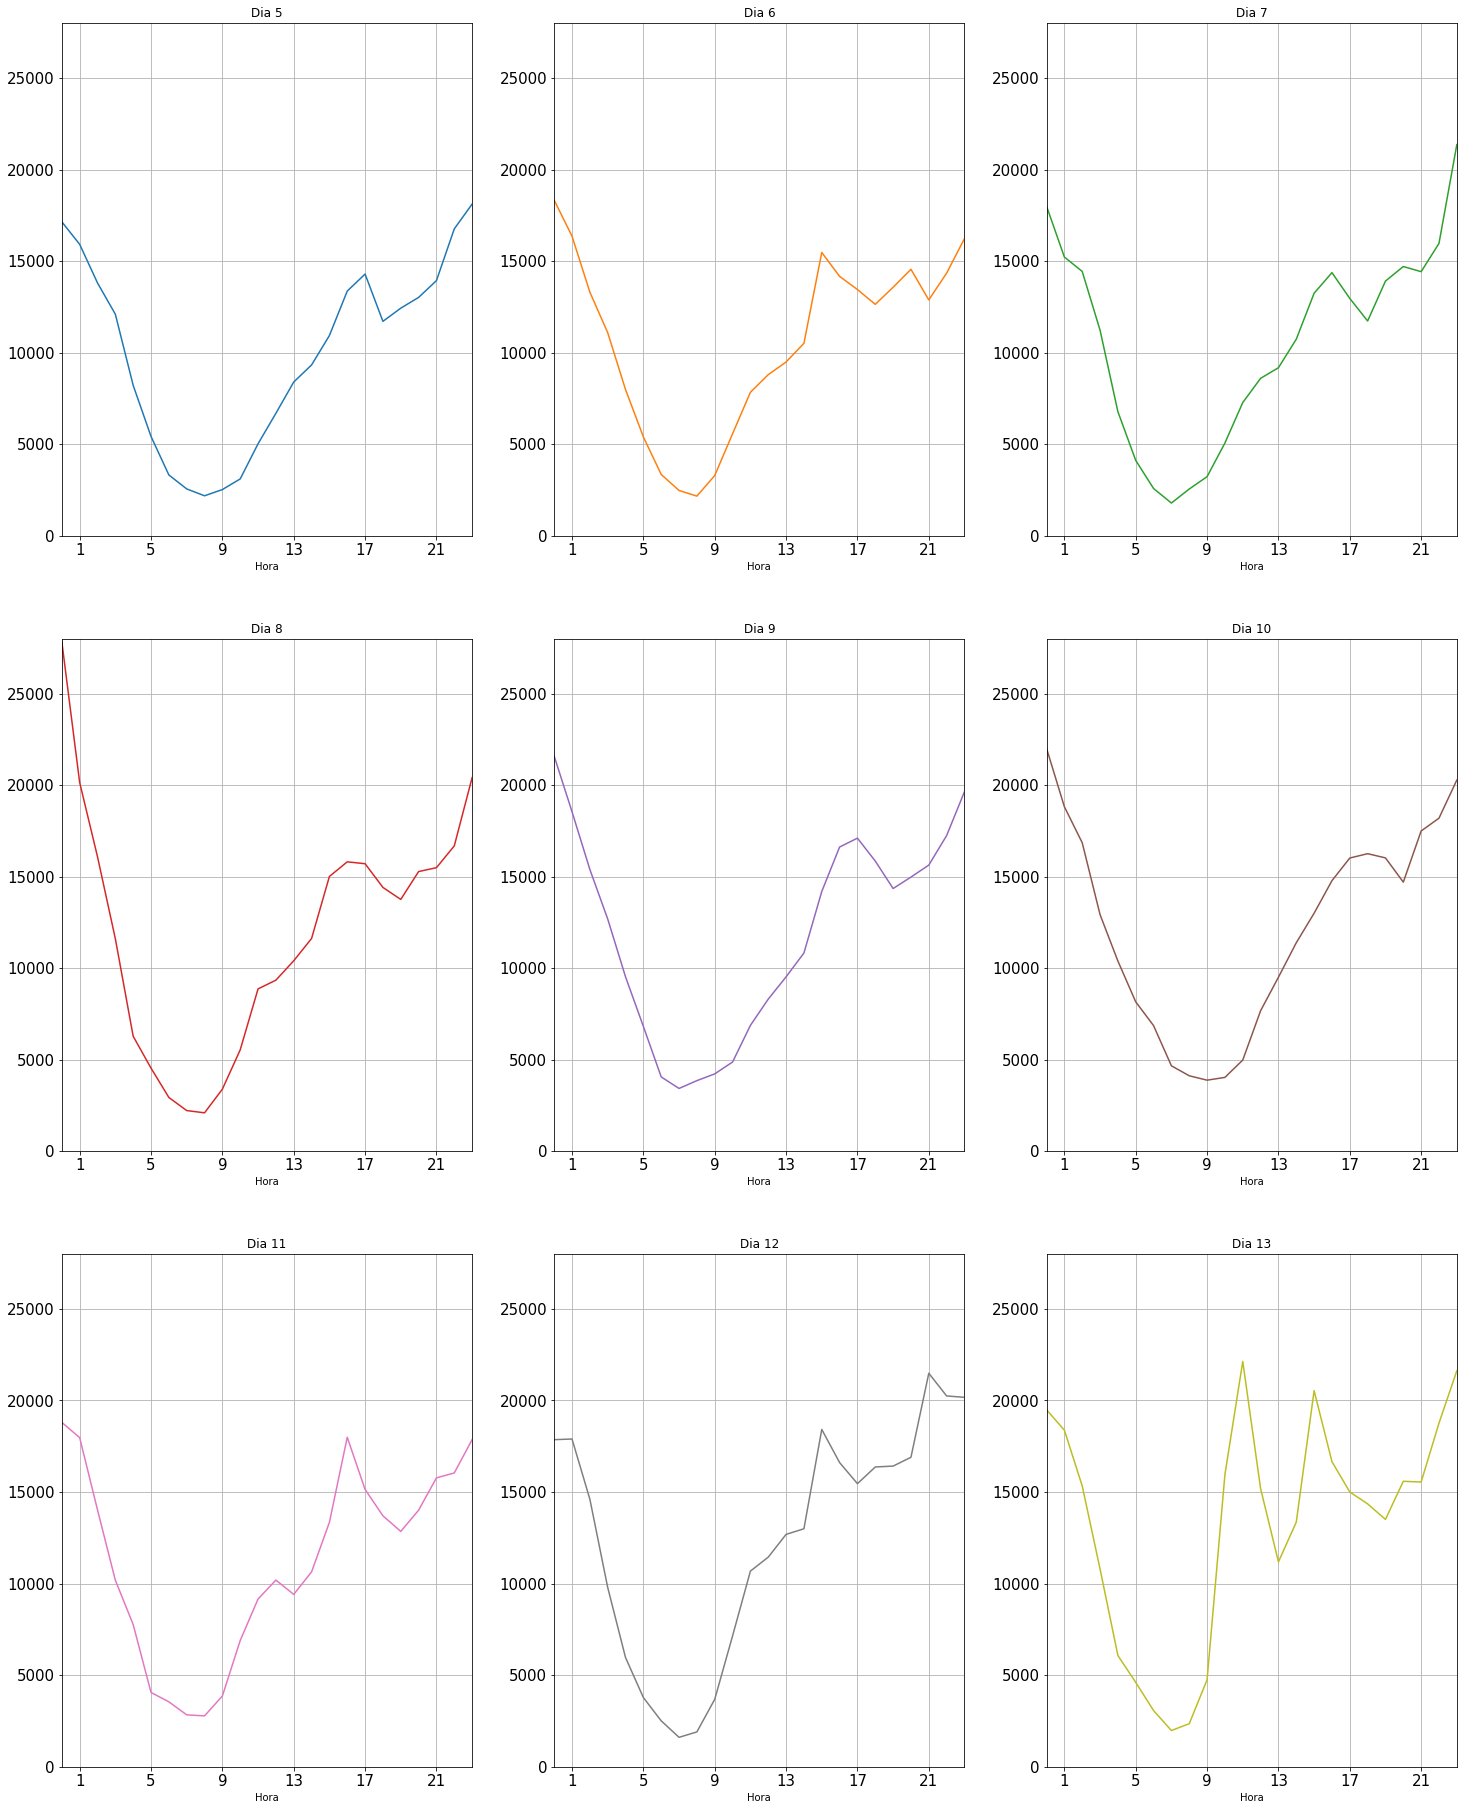

In [81]:
df_date_per_day[[5,6,7,8,9,10,11,12,13]].plot(title=['Dia 5', 'Dia 6',
                                                    'Dia 7','Dia 8',
                                                    'Dia 9','Dia 10',
                                                    'Dia 11','Dia 12',
                                                    'Dia 13'],
                                             sharex=False,
                                             legend=False,
                                             figsize=(25, 100),
                                             grid=True,
                                             xlim=(0,23),
                                             ylim=(0,28000),
                                             xticks=pd.Series(np.arange(1,24,4)),
                                             fontsize=15,
                                             subplots=True,
                                             layout=(9, 3));
#ojo con este save que con la figsize es grande el alto da extraño y hay que cropearlo dsp
#plt.savefig("res/events_per_day_per_hour.png",dpi=100)